In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# Option 1:
# import functions
# functions.function_name()
# 
# Option 2:
# from functions import function_name1, function_name2,...
# function_name12()

In [98]:
df = pd.read_csv(r"../Data/raw/online_retail 2.csv")


In [99]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [100]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')


In [101]:
def lowercase_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if the column contains strings/object type
            df[col] = df[col].str.lower().str.replace(' ', '_')
    
    return df


In [102]:
df = lowercase_columns(df)

In [103]:
#rename some columns to better use the df 
rename_mapping = {"invoiceno": "invoice_no", "stockcode": "stock_code", "invoicedate": "invoice_date", "unitprice": "unit_price", "customerid": "customer_id"}
df = df.rename(columns=rename_mapping)


In [104]:
df.head(5)

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,0,536365,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 08:26:00,2.55,17850.0,united_kingdom
1,1,536365,71053,white_metal_lantern,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom
2,2,536365,84406b,cream_cupid_hearts_coat_hanger,8,2010-12-01 08:26:00,2.75,17850.0,united_kingdom
3,3,536365,84029g,knitted_union_flag_hot_water_bottle,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom
4,4,536365,84029e,red_woolly_hottie_white_heart.,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom


In [105]:
df.shape

(541909, 9)

In [106]:
#checking for missing values
df.isnull().sum()

index                0
invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

In [107]:
test = df.copy()

In [108]:
#Drop columns with missing values and rows without interest for the final analysis

test = test.dropna(subset=['description', 'customer_id'])

index_to_drop = test[test['unit_price'] == 0].index
test.drop(index_to_drop, inplace=True)

test = test.drop('index', axis=1)

drop = test[test['stock_code'] == "dot"].index
test.drop(drop, inplace=True)

drop = test[test['description'] == "postage"].index
test.drop(drop, inplace=True)

drop = test[test["quantity"] <= 0].index
test.drop(drop, inplace= True)

drop = test[test["stock_code"] == "d"].index
test.drop(drop, inplace = True)

drop = test[test["stock_code"] == "m"].index
test.drop(drop, inplace = True)

drop = test[test["stock_code"] == "b"].index
test.drop(drop, inplace = True)

drop = test[test["description"] == "lost"].index
test.drop(drop, inplace = True)

drop = test[test["description"] == "amazon_fee"].index
test.drop(drop, inplace = True)

drop = test[test["description"] == "carriage"].index
test.drop(drop, inplace = True)

drop = test[test["stock_code"] == "pads"].index
test.drop(drop, inplace = True)

drop = test[test["stock_code"] == "bank_charges"].index
test.drop(drop, inplace = True)

drop = test[test["description"] == "samples"].index
test.drop(drop, inplace = True)

In [109]:
test.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [110]:
#creating a new column called "revenue" and date
test["revenue"]= test["unit_price"] * test["quantity"]
test['date_invoice'] = test['invoice_date'].dt.date
test['hour_invoice'] = test['invoice_date'].dt.time



In [111]:
test = test.sort_values(by='invoice_date')


In [112]:
test.describe()

,quantity,invoice_date,unit_price,customer_id,revenue
count,396337.000000,396337,396337.000000,396337.000000,396337.000000
mean,13.012547,2011-07-11 00:04:38.980463616,2.868222,15301.689416,22.105094
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000,0.060000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,179.641245,NaN,4.264663,1709.961948,308.899121


In [113]:
test.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date_invoice,hour_invoice
541896,581587,22555,plasters_in_tin_strongman,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00
541895,581587,22556,plasters_in_tin_circus_parade_,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00
541907,581587,23255,childrens_cutlery_circus_parade,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011-12-09,12:50:00
541900,581587,22730,alarm_clock_bakelike_ivory,4,2011-12-09 12:50:00,3.75,12680.0,france,15.00,2011-12-09,12:50:00
541908,581587,22138,baking_set_9_piece_retrospot_,3,2011-12-09 12:50:00,4.95,12680.0,france,14.85,2011-12-09,12:50:00


In [114]:
def add_period_flag(df):
    # Ensure the 'date_invoice' column is datetime
    df['date_invoice'] = pd.to_datetime(df['date_invoice'])

    # Define the date ranges and corresponding labels
    date_ranges = [
        (pd.Timestamp('2010-12-01'), pd.Timestamp('2010-12-31'), 'December 10'),
        (pd.Timestamp('2011-01-01'), pd.Timestamp('2011-01-31'), 'January 11'),
        (pd.Timestamp('2011-02-01'), pd.Timestamp('2011-02-28'), 'February 11'),
        (pd.Timestamp('2011-03-01'), pd.Timestamp('2011-03-31'), 'March 11'),
        (pd.Timestamp('2011-04-01'), pd.Timestamp('2011-04-30'), 'April 11'),
        (pd.Timestamp('2011-05-01'), pd.Timestamp('2011-05-31'), 'May 11'),
        (pd.Timestamp('2011-06-01'), pd.Timestamp('2011-06-30'), 'June 11'),
        (pd.Timestamp('2011-07-01'), pd.Timestamp('2011-07-31'), 'July 11'),
        (pd.Timestamp('2011-08-01'), pd.Timestamp('2011-08-31'), 'August 11'),
        (pd.Timestamp('2011-09-01'), pd.Timestamp('2011-09-30'), 'September 11'),
        (pd.Timestamp('2011-10-01'), pd.Timestamp('2011-10-31'), 'October 11'),
        (pd.Timestamp('2011-11-01'), pd.Timestamp('2011-11-30'), 'November 11'),
        (pd.Timestamp('2011-12-01'), pd.Timestamp('2011-12-31'), 'December 11')
    ]

    # Initialize the new column with NaN values
    df['period_flag'] = pd.NA

    # Iterate through the date ranges and set the corresponding labels
    for start_date, end_date, label in date_ranges:
        mask = (df['date_invoice'] >= start_date) & (df['date_invoice'] <= end_date)
        df.loc[mask, 'period_flag'] = label

    return df

In [115]:
df_with_flags = add_period_flag(test)


In [116]:
aggregated_df = test.groupby('customer_id')[['revenue']].sum()


In [117]:
aggregated_df

,revenue
customer_id,
12346.0,77183.60
12347.0,4310.00
12348.0,1437.24
12349.0,1457.55
12350.0,294.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


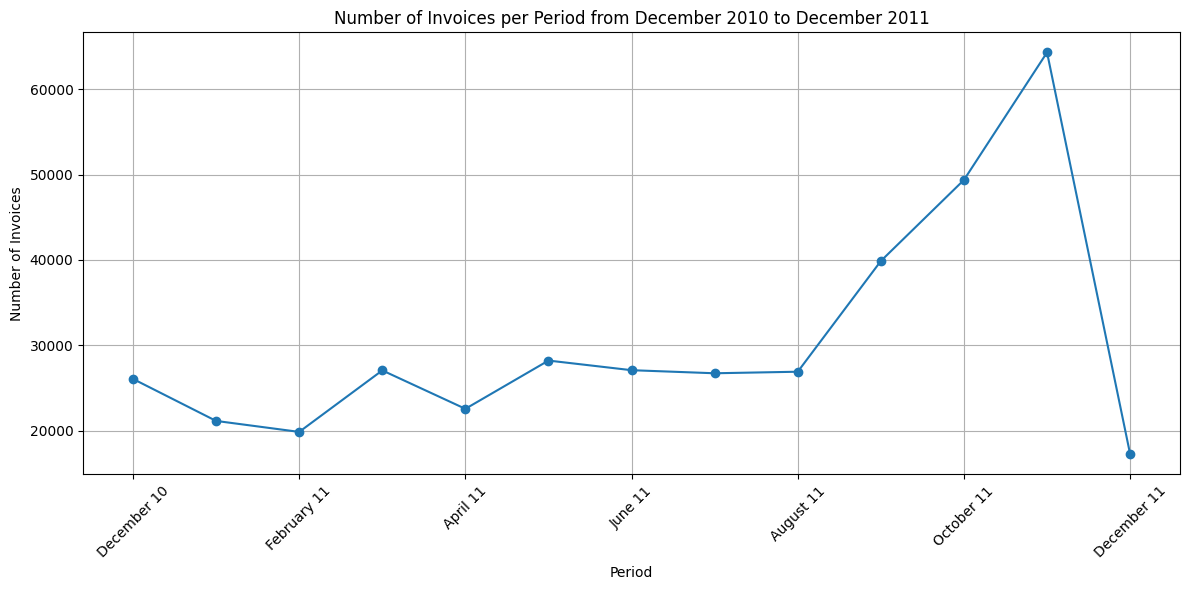

In [118]:
# Get the value counts for each period and sort by date
value_counts = df_with_flags['period_flag'].value_counts().sort_index()

# Define the order of the periods
period_order = [
    'December 10', 'January 11', 'February 11', 'March 11',
    'April 11', 'May 11', 'June 11', 'July 11', 'August 11',
    'September 11', 'October 11', 'November 11', 'December 11'
]

# Reindex the value counts to ensure correct order
value_counts = value_counts.reindex(period_order)

# Plotting the line graph
plt.figure(figsize=(12, 6))
value_counts.plot(kind='line', marker='o')
plt.title('Number of Invoices per Period from December 2010 to December 2011')
plt.xlabel('Period')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [169]:
def calculate_clv(data):
    data['customer_id'] = data['customer_id'].astype(str)
    
    # Group by CustomerID
    customer_group = data.groupby('customer_id').agg(
        TotalPrice=('revenue', 'sum'),
        NumPurchases=('invoice_no', 'nunique'),
        NumInvoices=('invoice_no', 'count'),
        InvoiceDate=('invoice_date', 'max')
    )
    
    # Calculate APV (Average Purchase Value)
    customer_group['APV'] = customer_group['TotalPrice'] / customer_group['NumPurchases']
    
    # Calculate APFR (Average Purchase Frequency Rate)
    customer_group['APFR'] = customer_group['NumPurchases'] / customer_group['NumInvoices']
    
    # Calculate Customer Lifespan (for example, duration between first and last purchase)
    customer_group['CustomerLifespan'] = (customer_group['InvoiceDate'] - customer_group['InvoiceDate'].min()).dt.days
    
    # Calculate CLV_individual
    customer_group['clv_individual'] = customer_group['APV'] * customer_group['APFR'] * customer_group['CustomerLifespan']
    
    # Reset index to get CustomerID back as a column
    clv_df = customer_group.reset_index()
    
    # Return the DataFrame with CustomerID and CLV_individual
    return clv_df[['customer_id', 'clv_individual']]

In [170]:
clv = calculate_clv(test)

In [171]:
clv 

,customer_id,clv_individual
0,12346.0,3.704813e+06
1,12347.0,8.785769e+03
2,12348.0,1.586287e+04
3,12349.0,7.166287e+03
4,12350.0,1.159200e+03
...,...,...
4329,18280.0,1.715700e+03
4330,18281.0,2.228323e+03
4331,18282.0,5.430525e+03
4332,18283.0,1.025072e+03


In [122]:
clv.describe()

,CLV_individual
count,4.334000e+03
mean,1.532019e+04
std,3.260192e+05
min,0.000000e+00
25%,2.443821e+03
50%,5.070144e+03
75%,7.299804e+03
max,2.089059e+07


In [123]:
clv_good = clv[clv["CLV_individual"] <= 100000]

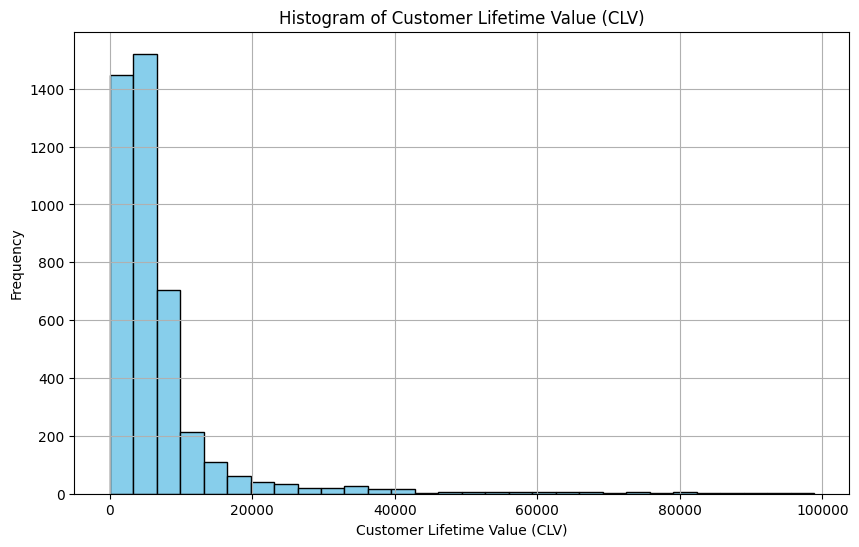

In [124]:
import matplotlib.pyplot as plt

# Example CLV data (replace with your actual CLV data)
# clv_data = pd.DataFrame(...)

# Create a histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(clv_good['CLV_individual'], bins=30, edgecolor='black', color='skyblue')

# Adding labels and title
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Lifetime Value (CLV)')

# Adding a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [125]:
test[test["stock_code"] == "85123a"]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date_invoice,hour_invoice,period_flag,CustomerID
0,536365,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 08:26:00,2.55,17850.0,united_kingdom,15.30,2010-12-01,08:26:00,December 10,17850.0
49,536373,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 09:02:00,2.55,17850.0,united_kingdom,15.30,2010-12-01,09:02:00,December 10,17850.0
66,536375,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 09:32:00,2.55,17850.0,united_kingdom,15.30,2010-12-01,09:32:00,December 10,17850.0
220,536390,85123a,white_hanging_heart_t-light_holder,64,2010-12-01 10:19:00,2.55,17511.0,united_kingdom,163.20,2010-12-01,10:19:00,December 10,17511.0
262,536394,85123a,white_hanging_heart_t-light_holder,32,2010-12-01 10:39:00,2.55,13408.0,united_kingdom,81.60,2010-12-01,10:39:00,December 10,13408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538708,581412,85123a,cream_hanging_heart_t-light_holder,4,2011-12-08 14:38:00,2.95,14415.0,united_kingdom,11.80,2011-12-08,14:38:00,December 11,14415.0
539083,581432,85123a,cream_hanging_heart_t-light_holder,32,2011-12-08 15:51:00,2.55,13798.0,united_kingdom,81.60,2011-12-08,15:51:00,December 11,13798.0
539979,581452,85123a,white_hanging_heart_t-light_holder,32,2011-12-08 18:03:00,2.55,17675.0,united_kingdom,81.60,2011-12-08,18:03:00,December 11,17675.0
540217,581472,85123a,white_hanging_heart_t-light_holder,6,2011-12-08 19:55:00,2.95,15796.0,united_kingdom,17.70,2011-12-08,19:55:00,December 11,15796.0


In [126]:
test["invoice_no"].count()

np.int64(396337)

In [127]:
crazy = test.copy()

In [128]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group transactions by invoice number and aggregate the stock codes
basket = (crazy.groupby(['invoice_no', 'stock_code'])['stock_code']
          .count().unstack().reset_index().fillna(0)
          .set_index('invoice_no'))

# Encode the quantities to 1 for any positive value (indicating the item was purchased in the transaction)
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets with min_support=0.2
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)


# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

rules = rules.sort_values(by='lift', ascending=False)


# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print the generated rules
print("Association Rules:")
print(rules)

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_1746/2795942645.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
/Users/joaosousa/Desktop/Ironhack/final_project/final-project/venv_3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support        itemsets
206  0.107488        (85123a)
85   0.092544         (22423)
203  0.086947        (85099b)
173  0.074938         (47566)
195  0.074720         (84879)
..        ...             ...
54   0.020324         (22084)
232  0.020324  (22423, 22697)
18   0.020161         (21172)
19   0.020161         (21174)
172  0.020161         (23439)

[250 rows x 2 columns]
Association Rules:
       antecedents     consequents  antecedent support  consequent support  \
75  (22697, 22699)         (22698)            0.029399            0.030214   
78         (22698)  (22697, 22699)            0.030214            0.029399   
76  (22698, 22699)         (22697)            0.023693            0.037550   
77         (22697)  (22698, 22699)            0.037550            0.023693   
25         (22698)         (22697)            0.030214            0.037550   
..             ...             ...                 ...                 ...   
83         (47566)         (2329

In [129]:
top_frequent_itemsets = frequent_itemsets.head(20)  # Change the number to get more or fewer top itemsets

top_rules = rules.head(20)  # Change the number to get more or fewer top rules


In [130]:
top_of_top = top_rules[top_rules["confidence"] >= 0.50]

top_of_top

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
75,"(22697, 22699)",(22698),0.029399,0.030214,0.021193,0.720887,23.859293,0.020305,3.474531,0.987108
78,(22698),"(22697, 22699)",0.030214,0.029399,0.021193,0.701439,23.859293,0.020305,3.250929,0.987937
76,"(22698, 22699)",(22697),0.023693,0.037550,0.021193,0.894495,23.821280,0.020304,9.122350,0.981270
77,(22697),"(22698, 22699)",0.037550,0.023693,0.021193,0.564399,23.821280,0.020304,2.241289,0.995398
25,(22698),(22697),0.030214,0.037550,0.024997,0.827338,22.032817,0.023863,5.574188,0.984355
24,(22697),(22698),0.037550,0.030214,0.024997,0.665702,22.032817,0.023863,2.900961,0.991858
74,"(22697, 22698)",(22699),0.024997,0.042550,0.021193,0.847826,19.925537,0.020130,6.291816,0.974165
38,(22698),(22699),0.030214,0.042550,0.023693,0.784173,18.429560,0.022407,4.436186,0.975204
39,(22699),(22698),0.042550,0.030214,0.023693,0.556833,18.429560,0.022407,2.188306,0.987769
3,(22699),(22697),0.042550,0.037550,0.029399,0.690932,18.400197,0.027801,3.114042,0.987678


In [131]:
''' Rule: If a transaction contains both 22697 and 22699, it is 72.1% likely to also contain 22698.
Support: 2.12% of all transactions contain 22697, 22699, and 22698.
Confidence: Out of all transactions that contain 22697 and 22699, 72.1% also contain 22698.
Lift: Transactions containing 22697, 22699, and 22698 are approximately 23.86 times more likely than transactions containing 22698 alone.
'''

' Rule: If a transaction contains both 22697 and 22699, it is 72.1% likely to also contain 22698.\nSupport: 2.12% of all transactions contain 22697, 22699, and 22698.\nConfidence: Out of all transactions that contain 22697 and 22699, 72.1% also contain 22698.\nLift: Transactions containing 22697, 22699, and 22698 are approximately 23.86 times more likely than transactions containing 22698 alone.\n'

In [132]:
test.shape

(396337, 13)

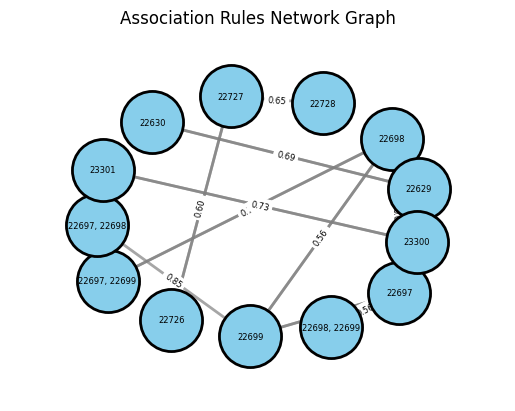

In [133]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add edges with attributes from the DataFrame top_of_top
for idx, row in top_of_top.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['lift'], confidence=row['confidence'], support=row['support'])

# Use a spring layout to position the nodes with more spacing
pos = nx.spring_layout(G, k=40)  # Increasing k for more spacing

# Draw nodes with custom options
node_options = {
    "node_size": 2000,  # Reduced node size
    "node_color": "skyblue",
    "edgecolors": "black",
    "linewidths": 2,
}
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw edges with custom options
edge_options = {
    "width": 2,
    "alpha": 0.7,
    "edge_color": "gray",
    "arrows": True,
}
nx.draw_networkx_edges(G, pos, **edge_options)

# Draw labels for the nodes with smaller font size
nx.draw_networkx_labels(G, pos, font_size=6, font_color='black', font_family='sans-serif')

# Draw edge labels with confidence only
edge_labels = {(u, v): f"{G[u][v]['confidence']:.2f}" for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)  # Smaller font size for edge labels

# Set margins to avoid clipping nodes
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.title("Association Rules Network Graph")
plt.show()


In [134]:
test[test["stock_code"] == "22727"]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date_invoice,hour_invoice,period_flag,CustomerID
27,536370,22727,alarm_clock_bakelike_red_,24,2010-12-01 08:45:00,3.75,12583.0,france,90.00,2010-12-01,08:45:00,December 10,12583.0
206,536389,22727,alarm_clock_bakelike_red_,4,2010-12-01 10:03:00,3.75,12431.0,australia,15.00,2010-12-01,10:03:00,December 10,12431.0
272,536395,22727,alarm_clock_bakelike_red_,8,2010-12-01 10:47:00,3.75,13767.0,united_kingdom,30.00,2010-12-01,10:47:00,December 10,13767.0
1225,536531,22727,alarm_clock_bakelike_red_,9,2010-12-01 13:23:00,3.75,15485.0,united_kingdom,33.75,2010-12-01,13:23:00,December 10,15485.0
3113,536599,22727,alarm_clock_bakelike_red_,4,2010-12-02 07:49:00,3.75,15694.0,united_kingdom,15.00,2010-12-02,07:49:00,December 10,15694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539899,581449,22727,alarm_clock_bakelike_red_,1,2011-12-08 17:37:00,3.75,12748.0,united_kingdom,3.75,2011-12-08,17:37:00,December 11,12748.0
540311,581476,22727,alarm_clock_bakelike_red_,8,2011-12-09 08:48:00,3.75,12433.0,norway,30.00,2011-12-09,08:48:00,December 11,12433.0
540431,581486,22727,alarm_clock_bakelike_red_,8,2011-12-09 09:38:00,3.75,17001.0,united_kingdom,30.00,2011-12-09,09:38:00,December 11,17001.0
541880,581585,22727,alarm_clock_bakelike_red_,4,2011-12-09 12:31:00,3.75,15804.0,united_kingdom,15.00,2011-12-09,12:31:00,December 11,15804.0


In [135]:
test

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date_invoice,hour_invoice,period_flag,CustomerID
0,536365,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 08:26:00,2.55,17850.0,united_kingdom,15.30,2010-12-01,08:26:00,December 10,17850.0
1,536365,71053,white_metal_lantern,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,17850.0
2,536365,84406b,cream_cupid_hearts_coat_hanger,8,2010-12-01 08:26:00,2.75,17850.0,united_kingdom,22.00,2010-12-01,08:26:00,December 10,17850.0
3,536365,84029g,knitted_union_flag_hot_water_bottle,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,17850.0
4,536365,84029e,red_woolly_hottie_white_heart.,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,17850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,plasters_in_tin_strongman,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00,December 11,12680.0
541895,581587,22556,plasters_in_tin_circus_parade_,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00,December 11,12680.0
541907,581587,23255,childrens_cutlery_circus_parade,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011-12-09,12:50:00,December 11,12680.0
541900,581587,22730,alarm_clock_bakelike_ivory,4,2011-12-09 12:50:00,3.75,12680.0,france,15.00,2011-12-09,12:50:00,December 11,12680.0


In [136]:
import pandas as pd
import datetime as dt


# Analysis date
analysis_date = test['invoice_date'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm = test.groupby('customer_id').agg({
    'invoice_date': lambda x: (analysis_date - x.max()).days,
    'invoice_no': 'count',
    'revenue': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary', ]

# Calculate RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm.head(20)




,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,182,4310.00,5,5,5,555
2,12348.0,75,27,1437.24,2,2,4,224
3,12349.0,19,72,1457.55,4,4,4,444
4,12350.0,310,16,294.40,1,2,2,122
5,12352.0,36,77,1385.74,3,4,4,344
6,12353.0,204,4,89.00,1,1,1,111
7,12354.0,232,58,1079.40,1,3,4,134
8,12355.0,214,13,459.40,1,1,2,112
9,12356.0,23,58,2487.43,4,3,5,435


In [137]:
rfm.dtypes

customer_id     float64
Recency           int64
Frequency         int64
Monetary        float64
R_Score        category
F_Score        category
M_Score        category
RFM_Score        object
dtype: object

In [138]:
rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)

In [139]:
# Define a function to segment RFM score
def segment_customers(df):
    if df['RFM_Score'] == '555':
        return 'Gold customer'
    elif df['RFM_Score'].startswith('5'):
        return 'Loyal Customers'
    elif df['RFM_Score'].startswith('4'): 
        return 'Potential Loyalists'
    elif df['RFM_Score'].endswith('5'):
        return 'Recent Customers'
    elif df['RFM_Score'].endswith('4'):
        return 'Promising'
    elif '33' in df['RFM_Score'] or '22' in df['RFM_Score'] or '11' in df['RFM_Score']:
        return 'At Risk'
    else:
        return 'Other'

#rfm['Segment'] = rfm.apply(segment_customers, axis=1)


In [140]:
rfm[(rfm["RFM_Score"] >= 444) & (rfm["RFM_Score"] <= 555)]


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
1,12347.0,2,182,4310.00,5,5,5,555
3,12349.0,19,72,1457.55,4,4,4,444
10,12357.0,33,131,6207.67,4,5,5,455
11,12358.0,2,17,928.06,5,2,4,524
15,12362.0,3,256,4737.23,5,5,5,555
...,...,...,...,...,...,...,...,...
4318,18263.0,26,61,1213.16,4,4,4,444
4323,18272.0,3,166,3078.58,5,5,5,555
4324,18273.0,2,3,204.00,5,1,1,511
4331,18282.0,8,12,178.05,5,1,1,511


In [141]:
rfm_2 = rfm.copy()

In [142]:
def segment_customers_2(df):
    if df['RFM_Score'] == 555:
        return 'Champion'
    elif df['R_Score'] >= 4 and df['F_Score'] >= 3 and df['F_Score'] >= 3:
        return 'Loyal Customers'
    elif df['R_Score'] >= 3 and df['F_Score'] >=3  and df['F_Score'] <= 5: 
        return 'Potential Loyalists'
    elif df['R_Score'] == 5:
        return 'Recent Customers'
    elif df['R_Score'] >= 2 and df['F_Score'] <=4 and df['F_Score'] <= 5 :
        return 'Promising'
    elif '33' in str(df['RFM_Score']) or '22' in str(df['RFM_Score']) or '11' in str(df['RFM_Score']):
        return 'At Risk'
    else:
        return 'Other'

In [143]:
rfm_2['Segment'] = rfm_2.apply(segment_customers_2, axis=1)


In [144]:
recent = rfm_2[rfm_2['Segment'] == "One-Time Customer"]

In [145]:
recent_2 = rfm_2[rfm_2['Segment'] == "Promising"]

In [146]:
recent_2

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
2,12348.0,75,27,1437.24,2,2,4,224,Promising
16,12363.0,110,23,552.00,2,2,3,223,Promising
28,12379.0,82,38,777.24,2,3,3,233,Promising
32,12384.0,29,25,425.27,4,2,2,422,Promising
35,12390.0,80,31,504.84,2,3,3,233,Promising
...,...,...,...,...,...,...,...,...,...
4322,18270.0,38,11,283.15,3,1,2,312,Promising
4325,18274.0,30,11,175.92,4,1,1,411,Promising
4326,18276.0,44,14,335.86,3,2,2,322,Promising
4327,18277.0,58,8,110.38,3,1,1,311,Promising


In [147]:
recent[recent["F_Score"] <=4 ]

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment


In [148]:
rfm["RFM_Score"].value_counts()

RFM_Score
555    310
111    257
455    163
122    155
444    122
      ... 
352      2
552      1
152      1
125      1
452      1
Name: count, Length: 119, dtype: int64

In [149]:
rfm_2['Segment'] = rfm_2.apply(segment_customers_2, axis=1)


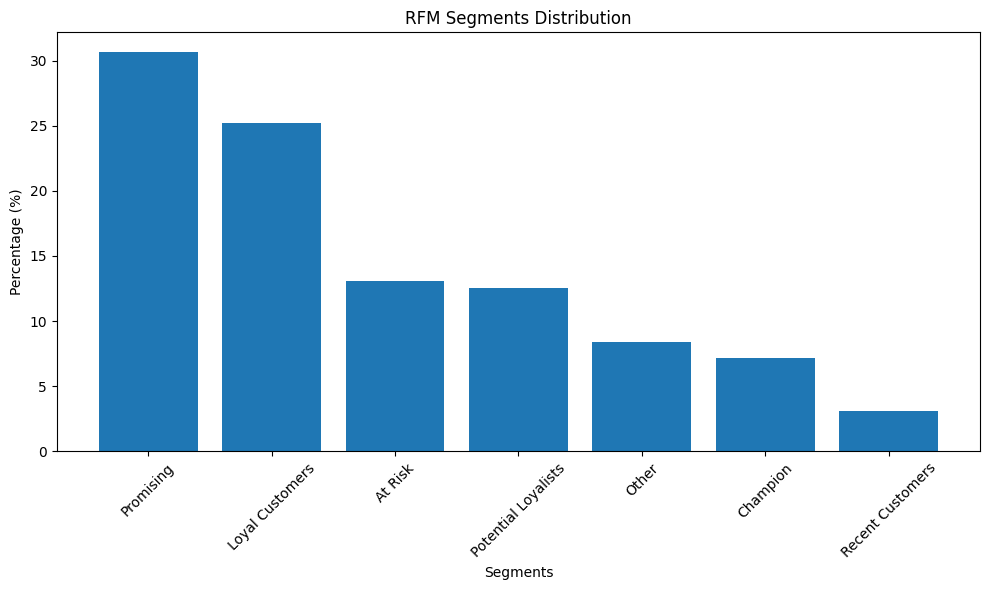

In [150]:
# Calculate percentages
segment_counts = rfm_2['Segment'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(segment_counts.index, segment_counts.values)

# Add titles and labels
plt.title('RFM Segments Distribution')
plt.xlabel('Segments')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Display the chart
plt.tight_layout()  # Ensures labels fit within figure area
plt.show()


In [151]:
# Define churn criteria (e.g., customers who haven't purchased in the last 90 days)
churn_threshold = 90

# Identify churned customers
rfm_2['Churned'] = rfm_2['Recency'] > churn_threshold

# Calculate total number of customers in each RFM segment
rfm_segment_counts = rfm_2['Segment'].value_counts().reset_index()
rfm_segment_counts.columns = ['Segment', 'Total_Customers']

# Calculate churn rate for each RFM segment
rfm_segment_churn_rate = rfm_2.groupby('Segment')['Churned'].mean().reset_index()
rfm_segment_churn_rate = rfm_segment_churn_rate.merge(rfm_segment_counts, on='Segment')

rfm_segment_churn_rate.columns = ['Segment', 'Churn Rate (%)', 'Total Customers']

print("Churn Rate by Defined RFM Segments:")
print(rfm_segment_churn_rate)

Churn Rate by Defined RFM Segments:
               Segment  Churn Rate (%)  Total Customers
0              At Risk        1.000000              567
1             Champion        0.000000              310
2      Loyal Customers        0.000000             1091
3                Other        0.939227              362
4  Potential Loyalists        0.000000              542
5            Promising        0.408133             1328
6     Recent Customers        0.000000              134


In [152]:
rfm_segment_churn_rate


,Segment,Churn Rate (%),Total Customers
0,At Risk,1.000000,567
1,Champion,0.000000,310
2,Loyal Customers,0.000000,1091
3,Other,0.939227,362
4,Potential Loyalists,0.000000,542
5,Promising,0.408133,1328
6,Recent Customers,0.000000,134


In [191]:
test = test.drop('CustomerID', axis=1)


In [193]:
test[test["country"]== "unspecified"]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date_invoice,hour_invoice,period_flag
152721,549687,21974,set_of_36_paisley_flower_doilies,12,2011-04-11 13:29:00,1.45,12363.0,unspecified,17.40,2011-04-11,13:29:00,April 11
152726,549687,21123,set/10_ivory_polkadot_party_candles,24,2011-04-11 13:29:00,1.25,12363.0,unspecified,30.00,2011-04-11,13:29:00,April 11
152725,549687,21122,set/10_pink_polkadot_party_candles,24,2011-04-11 13:29:00,1.25,12363.0,unspecified,30.00,2011-04-11,13:29:00,April 11
152727,549687,21121,set/10_red_polkadot_party_candles,24,2011-04-11 13:29:00,1.25,12363.0,unspecified,30.00,2011-04-11,13:29:00,April 11
152723,549687,21211,set_of_72_skull_paper__doilies,12,2011-04-11 13:29:00,1.45,12363.0,unspecified,17.40,2011-04-11,13:29:00,April 11
...,...,...,...,...,...,...,...,...,...,...,...,...
308811,564051,21833,camouflage_led_torch,12,2011-08-22 13:32:00,1.69,14265.0,unspecified,20.28,2011-08-22,13:32:00,August 11
308812,564051,23081,green_metal_box_army_supplies,2,2011-08-22 13:32:00,8.25,14265.0,unspecified,16.50,2011-08-22,13:32:00,August 11
308813,564051,23046,paper_lantern_9_point_deluxe_star,2,2011-08-22 13:32:00,6.65,14265.0,unspecified,13.30,2011-08-22,13:32:00,August 11
308814,564051,23045,paper_lantern_5_point_star_moon_,4,2011-08-22 13:32:00,4.15,14265.0,unspecified,16.60,2011-08-22,13:32:00,August 11


In [194]:
canceled = df[df["quantity"] <=0]

In [195]:
canceled

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,141,c536379,d,discount,-1,2010-12-01 09:41:00,27.50,14527.0,united_kingdom
154,154,c536383,35004c,set_of_3_coloured__flying_ducks,-1,2010-12-01 09:49:00,4.65,15311.0,united_kingdom
235,235,c536391,22556,plasters_in_tin_circus_parade_,-12,2010-12-01 10:24:00,1.65,17548.0,united_kingdom
236,236,c536391,21984,pack_of_12_pink_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom
237,237,c536391,21983,pack_of_12_blue_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom
...,...,...,...,...,...,...,...,...,...
540449,540449,c581490,23144,zinc_t-light_holder_stars_small,-11,2011-12-09 09:57:00,0.83,14397.0,united_kingdom
541541,541541,c581499,m,manual,-1,2011-12-09 10:28:00,224.69,15498.0,united_kingdom
541715,541715,c581568,21258,victorian_sewing_box_large,-5,2011-12-09 11:57:00,10.95,15311.0,united_kingdom
541716,541716,c581569,84978,hanging_heart_jar_t-light_holder,-1,2011-12-09 11:58:00,1.25,17315.0,united_kingdom


In [196]:
canceled[canceled["invoice_no"] == "c536391"]

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
235,235,c536391,22556,plasters_in_tin_circus_parade_,-12,2010-12-01 10:24:00,1.65,17548.0,united_kingdom
236,236,c536391,21984,pack_of_12_pink_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom
237,237,c536391,21983,pack_of_12_blue_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom
238,238,c536391,21980,pack_of_12_red_retrospot_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom
239,239,c536391,21484,chick_grey_hot_water_bottle,-12,2010-12-01 10:24:00,3.45,17548.0,united_kingdom
240,240,c536391,22557,plasters_in_tin_vintage_paisley_,-12,2010-12-01 10:24:00,1.65,17548.0,united_kingdom
241,241,c536391,22553,plasters_in_tin_skulls,-24,2010-12-01 10:24:00,1.65,17548.0,united_kingdom


In [201]:
# Apply the filter to pick only entries starting with 'c'
cancelations =df[df['invoice_no'].str.startswith('c')]


In [202]:
cancelations.isnull().sum()

index             0
invoice_no        0
stock_code        0
description       0
quantity          0
invoice_date      0
unit_price        0
customer_id     383
country           0
dtype: int64

In [203]:
cancelations = cancelations.dropna(subset=['customer_id'])

In [204]:
cancelations["stock_code"]

141            d
154       35004c
235        22556
236        21984
237        21983
           ...  
540449     23144
541541         m
541715     21258
541716     84978
541717     20979
Name: stock_code, Length: 8905, dtype: object

In [205]:
cancelations

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,141,c536379,d,discount,-1,2010-12-01 09:41:00,27.50,14527.0,united_kingdom
154,154,c536383,35004c,set_of_3_coloured__flying_ducks,-1,2010-12-01 09:49:00,4.65,15311.0,united_kingdom
235,235,c536391,22556,plasters_in_tin_circus_parade_,-12,2010-12-01 10:24:00,1.65,17548.0,united_kingdom
236,236,c536391,21984,pack_of_12_pink_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom
237,237,c536391,21983,pack_of_12_blue_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom
...,...,...,...,...,...,...,...,...,...
540449,540449,c581490,23144,zinc_t-light_holder_stars_small,-11,2011-12-09 09:57:00,0.83,14397.0,united_kingdom
541541,541541,c581499,m,manual,-1,2011-12-09 10:28:00,224.69,15498.0,united_kingdom
541715,541715,c581568,21258,victorian_sewing_box_large,-5,2011-12-09 11:57:00,10.95,15311.0,united_kingdom
541716,541716,c581569,84978,hanging_heart_jar_t-light_holder,-1,2011-12-09 11:58:00,1.25,17315.0,united_kingdom


In [206]:
filtered_cancelations = cancelations[cancelations['stock_code'].str.match(r'^\d', na=False)]


In [214]:
filtered_cancelations["cancelation_revenue"]= (filtered_cancelations["quantity"] * filtered_cancelations["unit_price"]).abs()

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_1746/2178493617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cancelations["cancelation_revenue"]= (filtered_cancelations["quantity"] * filtered_cancelations["unit_price"]).abs()


In [215]:
filtered_cancelations

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,cancelation_revenue
154,154,c536383,35004c,set_of_3_coloured__flying_ducks,-1,2010-12-01 09:49:00,4.65,15311.0,united_kingdom,4.65
235,235,c536391,22556,plasters_in_tin_circus_parade_,-12,2010-12-01 10:24:00,1.65,17548.0,united_kingdom,19.80
236,236,c536391,21984,pack_of_12_pink_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom,6.96
237,237,c536391,21983,pack_of_12_blue_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom,6.96
238,238,c536391,21980,pack_of_12_red_retrospot_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom,6.96
...,...,...,...,...,...,...,...,...,...,...
540448,540448,c581490,22178,victorian_glass_hanging_t-light,-12,2011-12-09 09:57:00,1.95,14397.0,united_kingdom,23.40
540449,540449,c581490,23144,zinc_t-light_holder_stars_small,-11,2011-12-09 09:57:00,0.83,14397.0,united_kingdom,9.13
541715,541715,c581568,21258,victorian_sewing_box_large,-5,2011-12-09 11:57:00,10.95,15311.0,united_kingdom,54.75
541716,541716,c581569,84978,hanging_heart_jar_t-light_holder,-1,2011-12-09 11:58:00,1.25,17315.0,united_kingdom,1.25


In [217]:
filtered_cancelations = pd.merge(filtered_cancelations, rfm_2[['customer_id', 'Segment']], on='customer_id', how='left')

In [218]:
filtered_cancelations

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,cancelation_revenue,Segment
0,154,c536383,35004c,set_of_3_coloured__flying_ducks,-1,2010-12-01 09:49:00,4.65,15311.0,united_kingdom,4.65,Champion
1,235,c536391,22556,plasters_in_tin_circus_parade_,-12,2010-12-01 10:24:00,1.65,17548.0,united_kingdom,19.80,At Risk
2,236,c536391,21984,pack_of_12_pink_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom,6.96,At Risk
3,237,c536391,21983,pack_of_12_blue_paisley_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom,6.96,At Risk
4,238,c536391,21980,pack_of_12_red_retrospot_tissues_,-24,2010-12-01 10:24:00,0.29,17548.0,united_kingdom,6.96,At Risk
...,...,...,...,...,...,...,...,...,...,...,...
8534,540448,c581490,22178,victorian_glass_hanging_t-light,-12,2011-12-09 09:57:00,1.95,14397.0,united_kingdom,23.40,Loyal Customers
8535,540449,c581490,23144,zinc_t-light_holder_stars_small,-11,2011-12-09 09:57:00,0.83,14397.0,united_kingdom,9.13,Loyal Customers
8536,541715,c581568,21258,victorian_sewing_box_large,-5,2011-12-09 11:57:00,10.95,15311.0,united_kingdom,54.75,Champion
8537,541716,c581569,84978,hanging_heart_jar_t-light_holder,-1,2011-12-09 11:58:00,1.25,17315.0,united_kingdom,1.25,Champion


In [227]:
filtered_cancelations.to_excel('cancelation.xlsx', index=False)


In [224]:
test['customer_id'] = test['customer_id'].astype(float)


In [225]:
df_merged = pd.merge(test, rfm_2[['customer_id', 'Segment']], on='customer_id', how='left')


In [226]:
df_merged

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date_invoice,hour_invoice,period_flag,Segment
0,536365,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 08:26:00,2.55,17850.0,united_kingdom,15.30,2010-12-01,08:26:00,December 10,Other
1,536365,71053,white_metal_lantern,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,Other
2,536365,84406b,cream_cupid_hearts_coat_hanger,8,2010-12-01 08:26:00,2.75,17850.0,united_kingdom,22.00,2010-12-01,08:26:00,December 10,Other
3,536365,84029g,knitted_union_flag_hot_water_bottle,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,Other
4,536365,84029e,red_woolly_hottie_white_heart.,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396332,581587,22555,plasters_in_tin_strongman,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00,December 11,Loyal Customers
396333,581587,22556,plasters_in_tin_circus_parade_,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00,December 11,Loyal Customers
396334,581587,23255,childrens_cutlery_circus_parade,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011-12-09,12:50:00,December 11,Loyal Customers
396335,581587,22730,alarm_clock_bakelike_ivory,4,2011-12-09 12:50:00,3.75,12680.0,france,15.00,2011-12-09,12:50:00,December 11,Loyal Customers


In [180]:
df_merged_final = pd.merge(df_merged, clv[['customer_id', 'clv_individual']], on='customer_id', how='left')

In [178]:
clv['customer_id'] = clv['customer_id'].astype(float)


In [179]:
clv.dtypes

customer_id       float64
clv_individual    float64
dtype: object

In [181]:
df_merged_final 

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date_invoice,hour_invoice,period_flag,Segment,clv_individual
0,536365,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 08:26:00,2.55,17850.0,united_kingdom,15.30,2010-12-01,08:26:00,December 10,Other,18.152222
1,536365,71053,white_metal_lantern,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,Other,18.152222
2,536365,84406b,cream_cupid_hearts_coat_hanger,8,2010-12-01 08:26:00,2.75,17850.0,united_kingdom,22.00,2010-12-01,08:26:00,December 10,Other,18.152222
3,536365,84029g,knitted_union_flag_hot_water_bottle,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,Other,18.152222
4,536365,84029e,red_woolly_hottie_white_heart.,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,2010-12-01,08:26:00,December 10,Other,18.152222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396332,581587,22555,plasters_in_tin_strongman,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00,December 11,Loyal Customers,6019.839388
396333,581587,22556,plasters_in_tin_circus_parade_,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,2011-12-09,12:50:00,December 11,Loyal Customers,6019.839388
396334,581587,23255,childrens_cutlery_circus_parade,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011-12-09,12:50:00,December 11,Loyal Customers,6019.839388
396335,581587,22730,alarm_clock_bakelike_ivory,4,2011-12-09 12:50:00,3.75,12680.0,france,15.00,2011-12-09,12:50:00,December 11,Loyal Customers,6019.839388


In [183]:
# Define the columns to drop in a list
columns_to_drop = ['date_invoice', 'hour_invoice', 'period_flag']

# Drop the specified columns from df_merged_final and assign the result to df_clean
df_clean = df_merged_final.drop(columns=columns_to_drop)

In [184]:
df_clean

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,Segment,clv_individual
0,536365,85123a,white_hanging_heart_t-light_holder,6,2010-12-01 08:26:00,2.55,17850.0,united_kingdom,15.30,Other,18.152222
1,536365,71053,white_metal_lantern,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,Other,18.152222
2,536365,84406b,cream_cupid_hearts_coat_hanger,8,2010-12-01 08:26:00,2.75,17850.0,united_kingdom,22.00,Other,18.152222
3,536365,84029g,knitted_union_flag_hot_water_bottle,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,Other,18.152222
4,536365,84029e,red_woolly_hottie_white_heart.,6,2010-12-01 08:26:00,3.39,17850.0,united_kingdom,20.34,Other,18.152222
...,...,...,...,...,...,...,...,...,...,...,...
396332,581587,22555,plasters_in_tin_strongman,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,Loyal Customers,6019.839388
396333,581587,22556,plasters_in_tin_circus_parade_,12,2011-12-09 12:50:00,1.65,12680.0,france,19.80,Loyal Customers,6019.839388
396334,581587,23255,childrens_cutlery_circus_parade,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,Loyal Customers,6019.839388
396335,581587,22730,alarm_clock_bakelike_ivory,4,2011-12-09 12:50:00,3.75,12680.0,france,15.00,Loyal Customers,6019.839388


In [185]:
df_clean.to_excel('clean_data.xlsx', index=False)


In [187]:
test.shape

(396337, 13)

In [188]:
test["customer_id"].value_counts()

customer_id
17841.0    7838
14911.0    5589
14096.0    5095
12748.0    4580
14606.0    2697
           ... 
16990.0       1
13366.0       1
12346.0       1
14705.0       1
17715.0       1
Name: count, Length: 4334, dtype: int64

In [189]:
dfdf_clean["country"]== "unspecified"]

customer_id
17841.0    7838
14911.0    5589
14096.0    5095
12748.0    4580
14606.0    2697
           ... 
16990.0       1
13366.0       1
12346.0       1
14705.0       1
17715.0       1
Name: count, Length: 4334, dtype: int64